In [1]:
import selenium
import pandas as pd
import time

from selenium import webdriver

from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException

import re
from selenium.webdriver.common.by import By

import warnings
warnings.filterwarnings('ignore')

In [2]:
#connecting to driver
driver=webdriver.Chrome(r"D:\softwares\chromedriver_win32\chromedriver.exe")

#maximizing browser window
driver.maximize_window()

In [3]:
#opening wikipedia.com website
url='https://www.kayak.co.in/flights'
driver.get(url)
time.sleep(5)

In [5]:
#Vasco departure

dep_loc=driver.find_element(By.XPATH,'/html/body/div[2]/div[1]/main/div[1]/div[1]/div/div[1]/div/div/section[2]/div/div/div/div/div/div[1]/div[2]/div/div[3]/div/div/input')
dep_loc.send_keys('Vasco')
dep_loc.click()



In [5]:
#delhi arrival
arr_loc=driver.find_element(By.XPATH,'/html/body/div[2]/div[1]/main/div[1]/div[1]/div/div[1]/div/div/section[2]/div/div/div/div/div/div[1]/div[2]/div/div[3]/div/div/input')
arr_loc.send_keys('New Delhi')

In [6]:
date_click=driver.find_element(By.XPATH,'/html/body/div[7]/div/div[2]/div/div[2]/div/div[2]/div[1]/div[2]/div[26]')
date_click.click()

In [7]:
search_btn=driver.find_element(By.XPATH,'/html/body/div[2]/div[1]/main/div[1]/div[1]/div/div[1]/div/div/section[2]/div/div/div/div/div/div[1]/div[2]/div/div[5]/button/div[1]')
search_btn.click()

In [8]:
name26=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="J0g6-operator-text"]')
    for i in description:
        name26.append(i.text)
except NoSuchElementException:
    name26.append('-')

In [11]:
len(name26)


303

In [15]:
departure26=[]
arrival26=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="EFvI"]/div/span[1]')
    count=0
    for i in description:
        if count%2!=0:
            arrival26.append(i.text)
        else:
            departure26.append(i.text)
        count+=1    
except NoSuchElementException:
    departure26.append('-')

In [17]:
len(arrival26),len(departure26)

(303, 303)

In [22]:
dep_time26=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-large"]/span[1]')
    for i in description:
        dep_time26.append(i.text)
except NoSuchElementException:
    dep_time26.append('-')

In [23]:
len(dep_time26)

303

In [24]:
arr_time26=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-large"]/span[3]')
    for i in description:
        arr_time26.append(i.text)
except NoSuchElementException:
    arr_time26.append('-')

In [25]:
len(arr_time26)

303

In [26]:
duration26=[]
stops_taken26=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-default"]')
    count=0
    for i in description:
        if count%2!=0:
            duration26.append(i.text)
        else:
            stops_taken26.append(i.text)
        count+=1
except NoSuchElementException:
    duration26.append('-')

In [28]:
len(duration26),len(stops_taken26)

(303, 303)

In [29]:
price_source26=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="M_JD-provider-name"]')
    for i in description:
        price_source26.append(i.text)
except NoSuchElementException:
    price_source26.append('-')

In [31]:
len(price_source26)

303

In [32]:
price26=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="f8F1-price-text"]')
    for i in description:
        price26.append(i.text)
except NoSuchElementException:
    price26.append('-')

In [33]:
len(price26)

303

In [34]:
date26=[]

try:
    description=driver.find_elements(By.XPATH,'//div[@class="mkUa mkUa-pres-mcfly mkUa-isStartDate mkUa-isEndDate mkUa-isSelected"]')
    for i in description:
        date26.append(i.text)
except NoSuchElementException:
    date26.append('-')

In [35]:
date26

['26']

In [37]:
dates=date26*303
len(dates)

303

In [56]:
data26=pd.DataFrame({'Date':dates,'flight_name':name26,'dep_loc':departure26,'arr_loc':arrival26,'dep_time':dep_time26,
                    'arr_time':arr_time26,'duration':duration26,'stops':stops_taken26,'price_source':price_source26,
                    'price':price26})
data26

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,happyfares,"₹ 5,904"
1,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,2h 25m,direct,Agoda.com,"₹ 4,721"
2,26,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 6,659"
3,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:50,2h 55m,direct,happyfares,"₹ 6,350"
4,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,15:25,18:05,2h 40m,direct,happyfares,"₹ 7,050"
...,...,...,...,...,...,...,...,...,...,...
298,26,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,114"
299,26,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,"₹ 37,114"
300,26,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,"₹ 37,114"
301,26,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:20,18h 10m,1 stop,Hahn Air Systems,"₹ 37,114"


In [57]:
data26.to_csv('26th flight details')

# Scrapping data for 27th day

In [3]:
#connecting to driver
driver=webdriver.Chrome(r"D:\softwares\chromedriver_win32\chromedriver.exe")

#maximizing browser window
driver.maximize_window()

In [4]:
#opening wikipedia.com website
url='https://www.kayak.co.in/flights'
driver.get(url)
time.sleep(5)

In [22]:
#delhi arrival
arr_loc1=driver.find_element(By.XPATH,'/html/body/div[2]/div[1]/main/div[1]/div[1]/div/div[1]/div/div/section[2]/div/div/div/div/div/div[1]/div[2]/div/div[3]/div/div/input')
arr_loc1.send_keys('New Delhi')

In [24]:
date_click=driver.find_element(By.XPATH,'/html/body/div[13]/div/div[2]/div/div[2]/div/div[2]/div[1]/div[2]/div[27]')
date_click.click()

In [25]:
search_btn=driver.find_element(By.XPATH,'/html/body/div[2]/div[1]/main/div[1]/div[1]/div/div[1]/div/div/section[2]/div/div/div/div/div/div[1]/div[2]/div/div[5]/button/div[1]/div')
search_btn.click()

In [59]:
name=[]
try:
    description=driver.find_elements(By.XPATH,'//span[@class="codeshares-airline-names"]')
    for i in description:
        name.append(i.text)
except NoSuchElementException:
    name.append('-')

In [61]:
len(name)

303

In [62]:
departure=[]
arrival=[]
try:
    description=driver.find_elements(By.XPATH,'//span[@class="airport-name"]')
    count=0
    for i in description:
        if count%2!=0:
            departure.append(i.text)
        else:
            arrival.append(i.text)
        count+=1    
except NoSuchElementException:
    departure.append('-')

In [63]:
len(departure),len(arrival)

(303, 303)

In [38]:
dep_time=[]
try:
    description=driver.find_elements(By.XPATH,'//span[@class="depart-time base-time"]')
    for i in description:
        dep_time.append(i.text)
except NoSuchElementException:
    dep_time.append('-')

In [40]:
len(dep_time)

303

In [41]:
arr_time=[]
try:
    description=driver.find_elements(By.XPATH,'//span[@class="arrival-time base-time"]')
    for i in description:
        arr_time.append(i.text)
except NoSuchElementException:
    arr_time.append('-')

In [42]:
len(arr_time)

303

In [47]:
stops_taken=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="section stops"]')
    for i in description:
        stops_taken.append(i.text.split('\n')[0])
except NoSuchElementException:
    stops_taken.append('-')

In [49]:
len(stops_taken)

303

In [50]:
duration=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="section duration allow-multi-modal-icons"]')
    for i in description:
        duration.append(i.text.split('\n')[0])
except NoSuchElementException:
    duration.append('-')

In [52]:
len(duration)

303

In [53]:
price_source=[]
try:
    description=driver.find_elements(By.XPATH,'//span[@class="name-only-text"]')
    for i in description:
        price_source.append(i.text)
except NoSuchElementException:
    price_source.append('-')

In [55]:
len(price_source)

303

In [73]:
price=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="multibook-dropdown"]')
    for i in description:
        price.append(i.text.split('\n')[0])
except NoSuchElementException:
    price.append('-')

In [75]:
len(price)

303

In [78]:
date=[]

try:
    description=driver.find_elements(By.XPATH,'//div[@class="NITa NITa-date-inline NITa-hasValue NITa-withDateArrows NITa-mod-multi-values"]')
    for i in description:
        date.append(i.text)
except NoSuchElementException:
    date.append('-')

In [79]:
date

['27/1']

In [81]:
dates=date*303

In [325]:
data27=pd.DataFrame({'Date':dates,'flight_name':name,'dep_loc':arrival,'arr_loc':departure,'dep_time':dep_time[:303],
                    'arr_time':arr_time,'duration':duration,'stops':stops_taken,'price_source':price_source,
                    'price':price})
data27

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,27/1,AirAsia India,GOI Goa Intl,DEL Indira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 6,042"
1,27/1,GoFirst,GOI Goa Intl,DEL Indira Gandhi Intl,18:15,08:00,8h 05m,1 stop,Agoda.com,"₹ 5,906"
2,27/1,GoFirst,GOI Goa Intl,DEL Indira Gandhi Intl,17:40,20:20,2h 40m,direct,Agoda.com,"₹ 6,325"
3,27/1,SpiceJet,GOI Goa Intl,DEL Indira Gandhi Intl,20:55,23:50,2h 55m,direct,happyfares,"₹ 6,450"
4,27/1,SpiceJet,GOI Goa Intl,DEL Indira Gandhi Intl,19:55,22:35,2h 40m,direct,happyfares,"₹ 6,550"
...,...,...,...,...,...,...,...,...,...,...
298,27/1,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,17:05,09:30,10h 40m,1 stop,Hahn Air Systems,"₹ 37,114"
299,27/1,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,01:20,12:20,13h 30m,1 stop,Hahn Air Systems,"₹ 37,114"
300,27/1,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,22:05,23:40,18h 30m,1 stop,Hahn Air Systems,"₹ 37,114"
301,27/1,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,19:10,19:20,21h 15m,1 stop,Hahn Air Systems,"₹ 37,744"


In [326]:
data27.to_csv('27 flight details')

# SCRAPPING FLIGHT DATA FOR 28th

In [144]:
#connecting to driver
driver=webdriver.Chrome(r"D:\softwares\chromedriver_win32\chromedriver.exe")

#maximizing browser window
driver.maximize_window()

In [145]:
#opening direct link of kayak.in to 28th date
url='https://www.kayak.co.in/flights/GOI-DEL/2023-01-28?sort=bestflight_a'
driver.get(url)
time.sleep(5)

In [148]:
name28=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="J0g6-operator-text"]')
    for i in description:
        name28.append(i.text)
except NoSuchElementException:
    name28.append('-')

In [150]:
len(name28)

281

In [157]:
departure28=[]
arrival28=[]
try:
    description=driver.find_elements(By.XPATH,'//span[@class="EFvI-ap-info"]')
    count=0
    for i in description:
        if count%2!=0:
            arrival28.append(i.text)
        else:
            departure28.append(i.text)
        count+=1    
except NoSuchElementException:
    arrival28.append('-')

In [159]:
len(departure28),len(arrival28)

(281, 281)

In [166]:
dep_time28=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-large"]/span[1]')
    for i in description:
        dep_time28.append(i.text)
except NoSuchElementException:
    dep_time28.append('-')

In [167]:
len(dep_time28)

281

In [169]:
arr_time28=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-large"]/span[3]')
    for i in description:
        arr_time28.append(i.text)
except NoSuchElementException:
    arr_time28.append('-')

In [170]:
len(arr_time28)

281

In [177]:
stops_taken28=[]
duration28=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-default"]')
    count=0
    for i in description:
        if count%2!=0:
            duration28.append(i.text)
        else:
            stops_taken28.append(i.text)
        count+=1
except NoSuchElementException:
    stops_taken28.append('-')

In [178]:
len(stops_taken28),len(duration28)

(281, 281)

In [181]:
price_source28=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="M_JD-provider-name"]')
    for i in description:
        price_source28.append(i.text)
except NoSuchElementException:
    price_source28.append('-')

In [182]:
len(price_source28)

281

In [183]:
price28=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="f8F1-price-text"]')
    for i in description:
        price28.append(i.text)
except NoSuchElementException:
    price28.append('-')

In [186]:
len(price28)

281

In [187]:
date28=[]

try:
    description=driver.find_elements(By.XPATH,'//div[@class="mkUa mkUa-pres-mcfly mkUa-isStartDate mkUa-isEndDate mkUa-isSelected"]')
    for i in description:
        date28.append(i.text)
except NoSuchElementException:
    date28.append('-')

In [188]:
date28

['28']

In [190]:
dates28=date28*281
len(dates28)

281

In [327]:
data28=pd.DataFrame({'Date':dates28,'flight_name':name28,'dep_loc':departure28,'arr_loc':arrival28,'dep_time':dep_time28,
                    'arr_time':arr_time28,'duration':duration28,'stops':stops_taken28,'price_source':price_source28,
                    'price':price28})
data28

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,28,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:50,2h 55m,direct,happyfares,"₹ 6,650"
1,28,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,05:55,14:20,8h 25m,1 stop,EaseMyTrip,"₹ 6,277"
2,28,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,19:55,22:35,2h 40m,direct,happyfares,"₹ 6,750"
3,28,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,happyfares,"₹ 6,962"
4,28,IndiGo,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:30,2h 35m,direct,happyfares,"₹ 7,020"
...,...,...,...,...,...,...,...,...,...,...
276,28,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,114"
277,28,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:20,18h 10m,1 stop,Hahn Air Systems,"₹ 37,114"
278,28,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,"₹ 37,324"
279,28,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,"₹ 37,324"


In [328]:
data28.to_csv('28 flight data')

# SCRAPPING FLIGHT DATA FOR 29th

In [193]:
#connecting to driver
driver=webdriver.Chrome(r"D:\softwares\chromedriver_win32\chromedriver.exe")

#maximizing browser window
driver.maximize_window()

In [194]:
#opening direct link of kayak.in to 29th date
url='https://www.kayak.co.in/flights/GOI-DEL/2023-01-29?sort=bestflight_a'
driver.get(url)
time.sleep(5)

In [197]:
name29=[]
try:
    description=driver.find_elements(By.XPATH,'//span[@class="codeshares-airline-names"]')
    for i in description:
        name29.append(i.text)
except NoSuchElementException:
    name29.append('-')

In [199]:
len(name29)

314

In [202]:
departure29=[]
arrival29=[]
try:
    description=driver.find_elements(By.XPATH,'//span[@class="airport-name"]')
    count=0
    for i in description:
        if count%2!=0:
            arrival29.append(i.text)
        else:
            departure29.append(i.text)
        count+=1    
except NoSuchElementException:
    departure29.append('-')

In [203]:
len(arrival29),len(departure29)

(314, 314)

In [204]:
dep_time29=[]
try:
    description=driver.find_elements(By.XPATH,'//span[@class="depart-time base-time"]')
    for i in description:
        dep_time29.append(i.text)
except NoSuchElementException:
    dep_time29.append('-')

In [206]:
len(dep_time29)

314

In [207]:
arr_time29=[]
try:
    description=driver.find_elements(By.XPATH,'//span[@class="arrival-time base-time"]')
    for i in description:
        arr_time29.append(i.text)
except NoSuchElementException:
    arr_time29.append('-')

In [209]:
len(arr_time29)

314

In [210]:
stops_taken29=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="section stops"]')
    for i in description:
        stops_taken29.append(i.text.split('\n')[0])
except NoSuchElementException:
    stops_taken29.append('-')

In [212]:
len(stops_taken29)

314

In [213]:
duration29=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="section duration allow-multi-modal-icons"]')
    for i in description:
        duration29.append(i.text.split('\n')[0])
except NoSuchElementException:
    duration29.append('-')

In [215]:
len(duration29)

314

In [216]:
price_source29=[]
try:
    description=driver.find_elements(By.XPATH,'//span[@class="name-only-text"]')
    for i in description:
        price_source29.append(i.text)
except NoSuchElementException:
    price_source29.append('-')

In [220]:
len(price_source29)

314

In [218]:
price29=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="multibook-dropdown"]')
    for i in description:
        price29.append(i.text.split('\n')[0])
except NoSuchElementException:
    price29.append('-')

In [221]:
len(price29)

314

In [224]:
date29=[]

try:
    description=driver.find_elements(By.XPATH,'//div[@class="mkUa mkUa-pres-mcfly mkUa-isStartDate mkUa-isEndDate mkUa-isSelected"]')
    for i in description:
        date29.append(i.text)
except NoSuchElementException:
    date29.append('-')

In [225]:
date29

['29']

In [226]:
dates29=date29*314
len(dates29)

314

In [329]:
data29=pd.DataFrame({'Date':dates29,'flight_name':name29,'dep_loc':departure29,'arr_loc':arrival29,'dep_time':dep_time29,
                    'arr_time':arr_time29,'duration':duration29,'stops':stops_taken29,'price_source':price_source29,
                    'price':price29})
data29

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,29,SpiceJet,GOI Goa Intl,DEL Indira Gandhi Intl,15:25,18:05,2h 40m,direct,happyfares,"₹ 10,000"
1,29,IndiGo,GOI Goa Intl,DEL Indira Gandhi Intl,02:05,06:40,4h 35m,1 stop,Agoda.com,"₹ 6,620"
2,29,GoFirst,GOI Goa Intl,DEL Indira Gandhi Intl,00:35,03:00,2h 25m,direct,Agoda.com,"₹ 7,316"
3,29,Air India,GOI Goa Intl,DEL Indira Gandhi Intl,01:15,03:50,2h 35m,direct,Gotogate,"₹ 8,333"
4,29,AirAsia India,GOI Goa Intl,DEL Indira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 11,207"
...,...,...,...,...,...,...,...,...,...,...
309,29,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,05:10,23:40,18h 30m,1 stop,Hahn Air Systems,"₹ 37,324"
310,29,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,22:20,08:35,10h 15m,1 stop,Hahn Air Systems,"₹ 37,427"
311,29,Alaska Seaplanes,GOI Goa Intl,DEL Indira Gandhi Intl,22:20,22:15,23h 55m,1 stop,Hahn Air Systems,"₹ 37,427"
312,29,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,22:50,09:30,10h 40m,1 stop,Hahn Air Systems,"₹ 39,739"


In [330]:
data29.to_csv('29 flight details')

# SCRAPPING DATA FOR 30

In [233]:
#connecting to driver
driver=webdriver.Chrome(r"D:\softwares\chromedriver_win32\chromedriver.exe")

#maximizing browser window
driver.maximize_window()

In [234]:
#opening direct link of kayak.in to 30th date
url='https://www.kayak.co.in/flights/GOI-DEL/2023-01-30?sort=bestflight_a'
driver.get(url)
time.sleep(5)

In [237]:
name30=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="J0g6-operator-text"]')
    for i in description:
        name30.append(i.text)
except NoSuchElementException:
    name30.append('-')

In [239]:
len(name30)

314

In [245]:
departure30=[]
arrival30=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="EFvI"]/div/span[1]')
    count=0
    for i in description:
        if count%2!=0:
            arrival30.append(i.text)
        else:
            departure30.append(i.text)
        count+=1    
except NoSuchElementException:
    departure30.append('-')

In [247]:
len(arrival30),len(departure30)

(314, 314)

In [248]:
dep_time30=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-large"]/span[1]')
    for i in description:
        dep_time30.append(i.text)
except NoSuchElementException:
    dep_time30.append('-')

In [250]:
len(dep_time30)

314

In [251]:
arr_time30=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-large"]/span[3]')
    for i in description:
        arr_time30.append(i.text)
except NoSuchElementException:
    arr_time30.append('-')

In [253]:
len(arr_time30)

314

In [254]:
duration30=[]
stops_taken30=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-default"]')
    count=0
    for i in description:
        if count%2!=0:
            duration30.append(i.text)
        else:
            stops_taken30.append(i.text)
        count+=1
except NoSuchElementException:
    duration.append('-')

In [257]:
len(stops_taken30),len(duration30)

(314, 314)

In [258]:
price_source30=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="M_JD-provider-name"]')
    for i in description:
        price_source30.append(i.text)
except NoSuchElementException:
    price_source30.append('-')

In [260]:
len(price_source30)

314

In [261]:
price30=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="f8F1-price-text"]')
    for i in description:
        price30.append(i.text)
except NoSuchElementException:
    price30.append('-')

In [263]:
len(price30)

314

In [266]:
date30=[]

try:
    description=driver.find_elements(By.XPATH,'//div[@class="mkUa mkUa-pres-mcfly mkUa-isStartDate mkUa-isEndDate mkUa-isSelected"]')
    for i in description:
        date30.append(i.text)
except NoSuchElementException:
    date30.append('-')

In [268]:
dates30=date30*314
len(dates30)

314

In [331]:
data30=pd.DataFrame({'Date':dates30,'flight_name':name30,'dep_loc':departure30,'arr_loc':arrival30,'dep_time':dep_time30,
                    'arr_time':arr_time30,'duration':duration30,'stops':stops_taken30,'price_source':price_source30,
                    'price':price30})
data30

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,30,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,18:05,00:35+1,6h 30m,1 stop,happyfares,"₹ 6,175"
1,30,IndiGo,GOIGoa Intl,DELIndira Gandhi Intl,22:30,01:00+1,2h 30m,direct,BudgetAir,"₹ 6,603"
2,30,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,18:05,22:15,4h 10m,direct,happyfares,"₹ 7,316"
3,30,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,15:25,18:05,2h 40m,direct,happyfares,"₹ 7,550"
4,30,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,FlightsMojo,"₹ 7,717"
...,...,...,...,...,...,...,...,...,...,...
309,30,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,324"
310,30,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:40,18h 30m,1 stop,Hahn Air Systems,"₹ 37,324"
311,30,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:20,08:35+1,10h 15m,1 stop,Hahn Air Systems,"₹ 37,427"
312,30,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:20,19:30+1,21h 10m,1 stop,Hahn Air Systems,"₹ 37,427"


In [332]:
data30.to_csv('30 flight details')

# SCRAPPING DATA FOR 31st

In [62]:
#connecting to driver
driver=webdriver.Chrome(r"D:\softwares\chromedriver_win32\chromedriver.exe")

#maximizing browser window
driver.maximize_window()

In [63]:
#opening direct link of kayak.in to 31st date
url='https://www.kayak.co.in/flights/GOI-DEL/2023-01-31?sort=bestflight_a'
driver.get(url)
time.sleep(5)

In [64]:
name31=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="J0g6-operator-text"]')
    for i in description:
        name31.append(i.text)
except NoSuchElementException:
    name31.append('-')

In [65]:
len(name31)

291

In [66]:
departure31=[]
arrival31=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="EFvI"]/div/span[1]')
    count=0
    for i in description:
        if count%2!=0:
            arrival31.append(i.text)
        else:
            departure31.append(i.text)
        count+=1    
except NoSuchElementException:
    departure31.append('-')

In [67]:
len(departure31),len(arrival31)

(291, 291)

In [68]:
dep_time31=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-large"]/span[1]')
    for i in description:
        dep_time31.append(i.text)
except NoSuchElementException:
    dep_time31.append('-')

In [69]:
len(dep_time31)

291

In [70]:
arr_time31=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-large"]/span[3]')
    for i in description:
        arr_time31.append(i.text)
except NoSuchElementException:
    arr_time31.append('-')

In [71]:
len(arr_time31)

291

In [72]:
duration31=[]
stops_taken31=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-default"]')
    count=0
    for i in description:
        if count%2!=0:
            duration31.append(i.text)
        else:
            stops_taken31.append(i.text)
        count+=1
except NoSuchElementException:
    stops_taken31.append('-')

In [73]:
len(stops_taken31),len(duration31)

(291, 291)

In [74]:
price_source31=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="M_JD-provider-name"]')
    for i in description:
        price_source31.append(i.text)
except NoSuchElementException:
    price_source31.append('-')

In [75]:
len(price_source31)

291

In [76]:
price31=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="f8F1-price-text"]')
    for i in description:
        price31.append(i.text)
except NoSuchElementException:
    price31.append('-')

In [77]:
len(price31)

291

In [80]:
date31=[]

try:
    description=driver.find_elements(By.XPATH,'//div[@class="mkUa mkUa-pres-mcfly mkUa-isStartDate mkUa-isEndDate mkUa-isSelected"]')
    for i in description:
        date31.append(i.text)
except NoSuchElementException:
    date31.append('-')

In [81]:
date31

['31']

In [82]:
dates31=date31*291
len(dates31)

291

In [83]:
data31=pd.DataFrame({'Date':dates31,'flight_name':name31,'dep_loc':departure31,'arr_loc':arrival31,'dep_time':dep_time31,
                    'arr_time':arr_time31,'duration':duration31,'stops':stops_taken31,'price_source':price_source31,'price':price31})
data31

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,31,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 5,850"
1,31,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,18:15,01:05+1,6h 50m,1 stop,Agoda.com,"₹ 5,774"
2,31,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,Agoda.com,"₹ 5,987"
3,31,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,19:55,22:35,2h 40m,direct,happyfares,"₹ 6,750"
4,31,IndiGo,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:30,2h 35m,direct,happyfares,"₹ 7,020"
...,...,...,...,...,...,...,...,...,...,...
286,31,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,104"
287,31,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,"₹ 37,104"
288,31,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,"₹ 37,104"
289,31,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:20,18h 10m,1 stop,Hahn Air Systems,"₹ 37,104"


In [84]:
data31.to_csv('31 flight details')

# SCRAPPING DATA FOR 1st Feb

In [303]:
#connecting to driver
driver=webdriver.Chrome(r"D:\softwares\chromedriver_win32\chromedriver.exe")

#maximizing browser window
driver.maximize_window()

In [304]:
#opening direct link of kayak.in to 1st feb date
url='https://www.kayak.co.in/flights/GOI-DEL/2023-02-01?sort=bestflight_a'
driver.get(url)
time.sleep(5)

In [305]:
name01=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="J0g6-operator-text"]')
    for i in description:
        name01.append(i.text)
except NoSuchElementException:
    name01.append('-')

In [308]:
len(name01)

311

In [309]:
departure01=[]
arrival01=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="EFvI"]/div/span[1]')
    count=0
    for i in description:
        if count%2!=0:
            arrival01.append(i.text)
        else:
            departure01.append(i.text)
        count+=1    
except NoSuchElementException:
    departure01.append('-')

In [310]:
len(arrival01),len(departure01)

(311, 311)

In [311]:
dep_time01=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-large"]/span[1]')
    for i in description:
        dep_time01.append(i.text)
except NoSuchElementException:
    dep_time01.append('-')

In [312]:
len(dep_time01)

311

In [313]:
arr_time01=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-large"]/span[3]')
    for i in description:
        arr_time01.append(i.text)
except NoSuchElementException:
    arr_time01.append('-')

In [314]:
len(arr_time01)

311

In [315]:
duration01=[]
stops_taken01=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="vmXl vmXl-mod-variant-default"]')
    count=0
    for i in description:
        if count%2!=0:
            duration01.append(i.text)
        else:
            stops_taken01.append(i.text)
        count+=1
except NoSuchElementException:
    stops_taken01.append('-')

In [316]:
len(duration01),len(stops_taken01)

(311, 311)

In [317]:
price_source01=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="M_JD-provider-name"]')
    for i in description:
        price_source01.append(i.text)
except NoSuchElementException:
    price_source01.append('-')

In [318]:
len(price_source01)

311

In [347]:
price01=[]
try:
    description=driver.find_elements(By.XPATH,'//div[@class="f8F1-price-text"]')
    for i in description:
        price01.append(i.text)
except NoSuchElementException:
    price01.append('-')

In [348]:
len(price01)

311

In [321]:
date01=[]

try:
    description=driver.find_elements(By.XPATH,'//div[@class="mkUa mkUa-pres-mcfly mkUa-isStartDate mkUa-isEndDate mkUa-isSelected"]')
    for i in description:
        date01.append(i.text)
except NoSuchElementException:
    date01.append('-')

In [322]:
date01

['1']

In [323]:
dates01=date01*311
len(dates01)

311

In [350]:
data01=pd.DataFrame({'Date':dates01,'flight_name':name01,'dep_loc':departure01,'arr_loc':arrival01,'dep_time':dep_time01,
                    'arr_time':arr_time01,'duration':duration01,'stops':stops_taken01,'price_source':price_source01,
                    'price':price01})
data01

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,1,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,16:35,19:10,2h 35m,direct,happyfares,"₹ 5,583"
1,1,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,2h 25m,direct,Agoda.com,"₹ 4,722"
2,1,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 5,583"
3,1,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,19:55,22:35,2h 40m,direct,EaseMyTrip,"₹ 6,216"
4,1,IndiGo,GOIGoa Intl,DELIndira Gandhi Intl,13:10,15:40,2h 30m,direct,Agoda.com,"₹ 6,241"
...,...,...,...,...,...,...,...,...,...,...
306,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,114"
307,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,"₹ 37,114"
308,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,"₹ 37,114"
309,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:40,18h 30m,1 stop,Hahn Air Systems,"₹ 37,114"


In [351]:
data01.to_csv('1 flight data')

# importing all data rich csv files and concating them into one

In [59]:
df1=pd.read_csv('26th flight details')
df1

,Unnamed: 0,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,0,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,happyfares,"₹ 5,904"
1,1,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,2h 25m,direct,Agoda.com,"₹ 4,721"
2,2,26,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 6,659"
3,3,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:50,2h 55m,direct,happyfares,"₹ 6,350"
4,4,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,15:25,18:05,2h 40m,direct,happyfares,"₹ 7,050"
...,...,...,...,...,...,...,...,...,...,...,...
298,298,26,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,114"
299,299,26,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,"₹ 37,114"
300,300,26,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,"₹ 37,114"
301,301,26,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:20,18h 10m,1 stop,Hahn Air Systems,"₹ 37,114"


In [50]:
df2=pd.read_csv('27 flight details')
df2

,Unnamed: 0,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,0,27/1,AirAsia India,GOI Goa Intl,DEL Indira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 6,042"
1,1,27/1,GoFirst,GOI Goa Intl,DEL Indira Gandhi Intl,18:15,08:00,8h 05m,1 stop,Agoda.com,"₹ 5,906"
2,2,27/1,GoFirst,GOI Goa Intl,DEL Indira Gandhi Intl,17:40,20:20,2h 40m,direct,Agoda.com,"₹ 6,325"
3,3,27/1,SpiceJet,GOI Goa Intl,DEL Indira Gandhi Intl,20:55,23:50,2h 55m,direct,happyfares,"₹ 6,450"
4,4,27/1,SpiceJet,GOI Goa Intl,DEL Indira Gandhi Intl,19:55,22:35,2h 40m,direct,happyfares,"₹ 6,550"
...,...,...,...,...,...,...,...,...,...,...,...
298,298,27/1,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,17:05,09:30,10h 40m,1 stop,Hahn Air Systems,"₹ 37,114"
299,299,27/1,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,01:20,12:20,13h 30m,1 stop,Hahn Air Systems,"₹ 37,114"
300,300,27/1,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,22:05,23:40,18h 30m,1 stop,Hahn Air Systems,"₹ 37,114"
301,301,27/1,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,19:10,19:20,21h 15m,1 stop,Hahn Air Systems,"₹ 37,744"


In [51]:
df3=pd.read_csv('28 flight data')
df3

,Unnamed: 0,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,0,28,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:50,2h 55m,direct,happyfares,"₹ 6,650"
1,1,28,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,05:55,14:20,8h 25m,1 stop,EaseMyTrip,"₹ 6,277"
2,2,28,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,19:55,22:35,2h 40m,direct,happyfares,"₹ 6,750"
3,3,28,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,happyfares,"₹ 6,962"
4,4,28,IndiGo,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:30,2h 35m,direct,happyfares,"₹ 7,020"
...,...,...,...,...,...,...,...,...,...,...,...
276,276,28,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,114"
277,277,28,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:20,18h 10m,1 stop,Hahn Air Systems,"₹ 37,114"
278,278,28,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,"₹ 37,324"
279,279,28,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,"₹ 37,324"


In [52]:
df4=pd.read_csv('29 flight details')
df4

,Unnamed: 0,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,0,29,SpiceJet,GOI Goa Intl,DEL Indira Gandhi Intl,15:25,18:05,2h 40m,direct,happyfares,"₹ 10,000"
1,1,29,IndiGo,GOI Goa Intl,DEL Indira Gandhi Intl,02:05,06:40,4h 35m,1 stop,Agoda.com,"₹ 6,620"
2,2,29,GoFirst,GOI Goa Intl,DEL Indira Gandhi Intl,00:35,03:00,2h 25m,direct,Agoda.com,"₹ 7,316"
3,3,29,Air India,GOI Goa Intl,DEL Indira Gandhi Intl,01:15,03:50,2h 35m,direct,Gotogate,"₹ 8,333"
4,4,29,AirAsia India,GOI Goa Intl,DEL Indira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 11,207"
...,...,...,...,...,...,...,...,...,...,...,...
309,309,29,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,05:10,23:40,18h 30m,1 stop,Hahn Air Systems,"₹ 37,324"
310,310,29,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,22:20,08:35,10h 15m,1 stop,Hahn Air Systems,"₹ 37,427"
311,311,29,Alaska Seaplanes,GOI Goa Intl,DEL Indira Gandhi Intl,22:20,22:15,23h 55m,1 stop,Hahn Air Systems,"₹ 37,427"
312,312,29,"Alaska Seaplanes, SpiceJet",GOI Goa Intl,DEL Indira Gandhi Intl,22:50,09:30,10h 40m,1 stop,Hahn Air Systems,"₹ 39,739"


In [53]:
df5=pd.read_csv('30 flight details')
df5

,Unnamed: 0,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,0,30,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,18:05,00:35+1,6h 30m,1 stop,happyfares,"₹ 6,175"
1,1,30,IndiGo,GOIGoa Intl,DELIndira Gandhi Intl,22:30,01:00+1,2h 30m,direct,BudgetAir,"₹ 6,603"
2,2,30,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,18:05,22:15,4h 10m,direct,happyfares,"₹ 7,316"
3,3,30,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,15:25,18:05,2h 40m,direct,happyfares,"₹ 7,550"
4,4,30,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,FlightsMojo,"₹ 7,717"
...,...,...,...,...,...,...,...,...,...,...,...
309,309,30,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,324"
310,310,30,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:40,18h 30m,1 stop,Hahn Air Systems,"₹ 37,324"
311,311,30,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:20,08:35+1,10h 15m,1 stop,Hahn Air Systems,"₹ 37,427"
312,312,30,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:20,19:30+1,21h 10m,1 stop,Hahn Air Systems,"₹ 37,427"


In [85]:
df6=pd.read_csv('31 flight details')
df6

,Unnamed: 0,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,0,31,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 5,850"
1,1,31,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,18:15,01:05+1,6h 50m,1 stop,Agoda.com,"₹ 5,774"
2,2,31,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,Agoda.com,"₹ 5,987"
3,3,31,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,19:55,22:35,2h 40m,direct,happyfares,"₹ 6,750"
4,4,31,IndiGo,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:30,2h 35m,direct,happyfares,"₹ 7,020"
...,...,...,...,...,...,...,...,...,...,...,...
286,286,31,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,104"
287,287,31,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,"₹ 37,104"
288,288,31,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,"₹ 37,104"
289,289,31,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:20,18h 10m,1 stop,Hahn Air Systems,"₹ 37,104"


In [55]:
df7=pd.read_csv('1 flight data')
df7

,Unnamed: 0,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,0,1,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,16:35,19:10,2h 35m,direct,happyfares,"₹ 5,583"
1,1,1,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,2h 25m,direct,Agoda.com,"₹ 4,722"
2,2,1,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 5,583"
3,3,1,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,19:55,22:35,2h 40m,direct,EaseMyTrip,"₹ 6,216"
4,4,1,IndiGo,GOIGoa Intl,DELIndira Gandhi Intl,13:10,15:40,2h 30m,direct,Agoda.com,"₹ 6,241"
...,...,...,...,...,...,...,...,...,...,...,...
306,306,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,114"
307,307,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,"₹ 37,114"
308,308,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,"₹ 37,114"
309,309,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:40,18h 30m,1 stop,Hahn Air Systems,"₹ 37,114"


In [86]:
#concating dataframes
df=[df1,df2,df3,df4,df5,df6,df7] #saving dataframe 
data=pd.concat(df)

In [61]:
#printing new dataframe after concating
data

,Unnamed: 0,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,0,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,happyfares,"₹ 5,904"
1,1,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,2h 25m,direct,Agoda.com,"₹ 4,721"
2,2,26,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 6,659"
3,3,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:50,2h 55m,direct,happyfares,"₹ 6,350"
4,4,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,15:25,18:05,2h 40m,direct,happyfares,"₹ 7,050"
...,...,...,...,...,...,...,...,...,...,...,...
306,306,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,114"
307,307,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,"₹ 37,114"
308,308,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,"₹ 37,114"
309,309,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:40,18h 30m,1 stop,Hahn Air Systems,"₹ 37,114"


In [87]:
data.to_csv('flight_data')

# Problem statement and understanding dataset

- **Problem statememt**:
    -Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given     flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -
    1. Time of purchase patterns (making sure last-minute purchases are expensive)
    2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales     and hold back inventory for those expensive last-minute expensive purchases)
- So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.


- **Understanding dataset**:
 - The flight data contains in csv file is scrapped from kayak.in website. The data scarpped is for flights that will be departing from only one location i.e. Goa airport and arriving at single location i.e New Delhi airport. The data scrapped is for 7 days i.e. starting from 26/Jan/2023 Thursday to 01/Feb/2023 Wednesday. This data will/could show the trend of prices changing at weekends or end of month.
 
 
- **Describing columns**:
  - Date: consists data for 7 days hence date starts from 26 Jan to 1st Feb
  - flight_name: consists of name of flight for particular data
  - dep_loc: consists of departure location
  - arr_loc: consists of arrival location
  - dep_time: consists of departure time i.e. when flight will be departed in 24h format
  - arr_time: consists of arrival time i.e. when flight will be landing in 24h format
  - duration: consists of total travel duration taken by flight.
  - stops: consists of number of stops taken by flight or whether flight landed directly.
  - price_source: consists of website name from where a particular flight data was taken by kayak.in website and that is       because this showed shoed lowest price for that flight booking.
  - price: consists of flight prices.


# Data Cleaning

In [130]:
# importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [131]:
# importing dataset
data=pd.read_csv('flight_data')
data

,Unnamed: 0.1,Unnamed: 0,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,0,0,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,happyfares,"₹ 5,904"
1,1,1,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,2h 25m,direct,Agoda.com,"₹ 4,721"
2,2,2,26,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 6,659"
3,3,3,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:50,2h 55m,direct,happyfares,"₹ 6,350"
4,4,4,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,15:25,18:05,2h 40m,direct,happyfares,"₹ 7,050"
...,...,...,...,...,...,...,...,...,...,...,...,...
2112,306,306,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,114"
2113,307,307,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,"₹ 37,114"
2114,308,308,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,"₹ 37,114"
2115,309,309,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:40,18h 30m,1 stop,Hahn Air Systems,"₹ 37,114"


In [132]:
data.shape

(2117, 12)

In [133]:
# dropping unnecessary columns i.e. unnamed 0.1 and unnamed 0
data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [134]:
#printing dataframe after dropping columns
data

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,happyfares,"₹ 5,904"
1,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,2h 25m,direct,Agoda.com,"₹ 4,721"
2,26,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,"₹ 6,659"
3,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:50,2h 55m,direct,happyfares,"₹ 6,350"
4,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,15:25,18:05,2h 40m,direct,happyfares,"₹ 7,050"
...,...,...,...,...,...,...,...,...,...,...
2112,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,"₹ 37,114"
2113,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,"₹ 37,114"
2114,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,"₹ 37,114"
2115,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:40,18h 30m,1 stop,Hahn Air Systems,"₹ 37,114"


In [135]:
#checking for any duplicate values in dataset.
data.duplicated().sum()

64

**Looks like there are 64 duplicate rows in dataset.Since duplicate data is not good for model building,I'll be deleting them.**

In [136]:
#deleting duplicate entries
data=data.drop_duplicates()

In [137]:
#confirming if all duplicates are deleted
data.duplicated().sum()

0

In [138]:
#replacing commas from price column
data['price']=data['price'].str.replace(',','')

In [139]:
#replacing rupee symbol from price column 
data['price']=data['price'].str.replace('₹','')

In [140]:
#changing datatype of price from object to integer

data['price']=data['price'].astype('int')

In [141]:
#printing dataset after doing above changes
data

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,duration,stops,price_source,price
0,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,2h 40m,direct,happyfares,5904
1,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,2h 25m,direct,Agoda.com,4721
2,26,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,2h 35m,direct,happyfares,6659
3,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:50,2h 55m,direct,happyfares,6350
4,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,15:25,18:05,2h 40m,direct,happyfares,7050
...,...,...,...,...,...,...,...,...,...,...
2112,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,7h 10m,1 stop,Hahn Air Systems,37114
2113,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,10h 40m,1 stop,Hahn Air Systems,37114
2114,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,13h 30m,1 stop,Hahn Air Systems,37114
2115,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:40,18h 30m,1 stop,Hahn Air Systems,37114


**Since duration column has format of for ex. 2h 40m, we need to change it as this kind of data cannot be used in model building, Hence creating seperate columns representing hour and minutes.**

In [142]:
# seperating hours and minutes from duration column

durations=list(data["duration"])
for i in range(len(durations)):
    if len(durations[i].split()) !=2: #checking if duration contain only hour or min
        if "h" in duration[i]:
            durations[i]=durations[i].strip() + " 0m" #add 0 mim
        else:
            durations[i]= "0h " + durations[i] #add 0 hour
            
duration_hours=[]
duration_mins=[]
for i in range (len(durations)):
    duration_hours.append(int(durations[i].split(sep="h")[0]))
    duration_mins.append(int(durations[i].split(sep="m")[0].split()[-1]))

In [143]:
#adding new columns to dataset consisting of duration hours and minutes
data['d_hours']=duration_hours
data['d_min']=duration_mins

In [144]:
#dropping 'duration' column as it is not useful anymore

data.drop(['duration'],inplace=True,axis=1)

In [145]:
#printing dataset after making above changes
data

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,stops,price_source,price,d_hours,d_min
0,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,direct,happyfares,5904,2,40
1,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,direct,Agoda.com,4721,2,25
2,26,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,direct,happyfares,6659,2,35
3,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:50,direct,happyfares,6350,2,55
4,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,15:25,18:05,direct,happyfares,7050,2,40
...,...,...,...,...,...,...,...,...,...,...,...
2112,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,1 stop,Hahn Air Systems,37114,7,10
2113,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30+1,1 stop,Hahn Air Systems,37114,10,40
2114,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20+1,1 stop,Hahn Air Systems,37114,13,30
2115,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:40,1 stop,Hahn Air Systems,37114,18,30


**in arrival time column there are values such as 12:20+1, the +1 mentioned in that values represents that flight will be landing next day and not on same day.Hence we need to remove this +1 values as its of no use.We have duration of flight and also the time shown in dataset is in 24h format so its understandable that flight will reach next day. hence removing that +1 from arrival time column.**

In [146]:
#Replacing + with space in arrival time column

data['arr_time']=data['arr_time'].str.replace('+',' ')
data['arr_time']

0         20:20
1         03:00
2         10:45
3         23:50
4         18:05
         ...   
2112      12:20
2113    09:30 1
2114    12:20 1
2115      23:40
2116      19:50
Name: arr_time, Length: 2053, dtype: object

In [147]:
#Tranferring data into arrival list so to split the data
arr_list=list(data['arr_time'])

In [148]:
#splitting the data for arrival time
for i in range(len(arr_list)):
    if len(arr_list[i].split(' '))==2:
        arr_list[i]=arr_list[i].split(' ')[0]
    else:
        arr_list[i]= arr_list[i]

In [149]:
#checking the list if +1 is removed or not
print(arr_list)

['20:20', '03:00', '10:45', '23:50', '18:05', '22:35', '19:10', '01:00', '03:50', '15:40', '16:45', '16:05', '16:40', '01:45', '22:15', '00:40', '22:15', '03:00', '06:40', '23:30', '00:35', '20:45', '22:55', '23:20', '12:40', '00:05', '00:25', '19:50', '23:30', '20:30', '00:35', '11:20', '18:05', '20:20', '22:20', '22:35', '18:05', '09:40', '08:00', '01:05', '02:00', '01:05', '02:00', '21:20', '14:20', '22:50', '07:30', '07:15', '07:50', '05:45', '14:15', '07:15', '15:00', '12:20', '22:30', '01:10', '08:00', '10:55', '01:35', '21:25', '22:20', '09:20', '15:55', '10:15', '12:15', '19:50', '20:40', '22:10', '20:50', '14:50', '19:45', '20:40', '21:20', '22:55', '07:55', '20:15', '22:15', '17:35', '23:50', '11:20', '20:45', '21:20', '23:30', '01:05', '02:00', '08:00', '08:00', '00:10', '14:20', '01:25', '10:05', '10:55', '12:05', '09:30', '12:20', '07:40', '08:35', '07:50', '09:05', '09:40', '07:55', '08:35', '23:20', '11:00', '05:45', '23:45', '19:50', '08:55', '08:55', '22:10', '09:15', 

In [150]:
#saving updated/cleaned data in arrival time column
data['arr_time']=arr_list

In [151]:
#printing arrival time column
print(data['arr_time'])

0       20:20
1       03:00
2       10:45
3       23:50
4       18:05
        ...  
2112    12:20
2113    09:30
2114    12:20
2115    23:40
2116    19:50
Name: arr_time, Length: 2053, dtype: object


In [152]:
#printing dataset with updated changes
data

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,stops,price_source,price,d_hours,d_min
0,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,direct,happyfares,5904,2,40
1,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,direct,Agoda.com,4721,2,25
2,26,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,direct,happyfares,6659,2,35
3,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:50,direct,happyfares,6350,2,55
4,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,15:25,18:05,direct,happyfares,7050,2,40
...,...,...,...,...,...,...,...,...,...,...,...
2112,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,1 stop,Hahn Air Systems,37114,7,10
2113,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30,1 stop,Hahn Air Systems,37114,10,40
2114,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20,1 stop,Hahn Air Systems,37114,13,30
2115,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:40,1 stop,Hahn Air Systems,37114,18,30


In [153]:
#replacing date data with only day and removing month value

data['Date']=data['Date'].str.replace('/1','')
data['Date']

0       26
1       26
2       26
3       26
4       26
        ..
2112     1
2113     1
2114     1
2115     1
2116     1
Name: Date, Length: 2053, dtype: object

In [154]:
#printing unique values for date
data['Date'].unique()

array(['26', '27', '28', '29', '30', '31', '1'], dtype=object)

In [155]:
#changing datatype from object to integer from date column

data['Date']=data['Date'].astype('int')

In [156]:
# printing final updated dataset.
data

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,stops,price_source,price,d_hours,d_min
0,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,17:40,20:20,direct,happyfares,5904,2,40
1,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,direct,Agoda.com,4721,2,25
2,26,AirAsia India,GOIGoa Intl,DELIndira Gandhi Intl,08:10,10:45,direct,happyfares,6659,2,35
3,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,20:55,23:50,direct,happyfares,6350,2,55
4,26,SpiceJet,GOIGoa Intl,DELIndira Gandhi Intl,15:25,18:05,direct,happyfares,7050,2,40
...,...,...,...,...,...,...,...,...,...,...,...
2112,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,12:20,1 stop,Hahn Air Systems,37114,7,10
2113,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,09:30,1 stop,Hahn Air Systems,37114,10,40
2114,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,22:50,12:20,1 stop,Hahn Air Systems,37114,13,30
2115,1,"Alaska Seaplanes, SpiceJet",GOIGoa Intl,DELIndira Gandhi Intl,05:10,23:40,1 stop,Hahn Air Systems,37114,18,30


# Data Analysis

In [157]:
#checking for datatypes of columns in  dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2116
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          2053 non-null   int32 
 1   flight_name   2053 non-null   object
 2   dep_loc       2053 non-null   object
 3   arr_loc       2053 non-null   object
 4   dep_time      2053 non-null   object
 5   arr_time      2053 non-null   object
 6   stops         2053 non-null   object
 7   price_source  2053 non-null   object
 8   price         2053 non-null   int32 
 9   d_hours       2053 non-null   int64 
 10  d_min         2053 non-null   int64 
dtypes: int32(2), int64(2), object(7)
memory usage: 176.4+ KB


In [158]:
#checking if there are any null values in dataset.
data.isnull().sum()

Date            0
flight_name     0
dep_loc         0
arr_loc         0
dep_time        0
arr_time        0
stops           0
price_source    0
price           0
d_hours         0
d_min           0
dtype: int64

- No null values seen in dataset.

In [159]:
data.columns

Index(['Date', 'flight_name', 'dep_loc', 'arr_loc', 'dep_time', 'arr_time',
       'stops', 'price_source', 'price', 'd_hours', 'd_min'],
      dtype='object')

In [160]:
data['Date'].value_counts()

29    308
30    302
1     301
27    299
26    291
31    277
28    275
Name: Date, dtype: int64

<AxesSubplot:xlabel='Date', ylabel='count'>

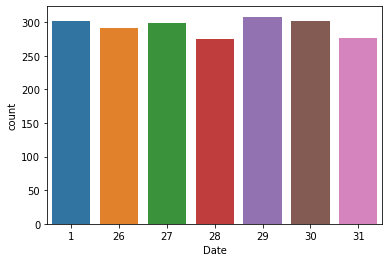

In [161]:
sns.countplot(data['Date'])

- On average approx 290 flights operate from Goa to Delhi airport.
- Flights compared to other days are low on 28th. 

In [162]:
data['flight_name'].unique()

array(['GoFirst', 'AirAsia India', 'SpiceJet', 'IndiGo', 'Air India',
       'Vistara', 'FlexFlight', 'GoFirst, Air India', 'Hahn Air Systems',
       'AirAsia India, GoFirst', 'AirAsia India, Air India',
       'AirAsia India, Vistara', 'GoFirst, IndiGo', 'Air India, IndiGo',
       'IndiGo, GoFirst', 'Oman Air', 'Vistara, Etihad Airways',
       'Qatar Airways', 'Alaska Seaplanes, SpiceJet', 'Alaska Seaplanes',
       'IndiGo, AirAsia India', 'Air India, Vistara', 'IndiGo, SpiceJet',
       'IndiGo, Air India', 'IndiGo, Akasa Air', 'Vistara, IndiGo',
       'Oman Air, Vistara', 'AirAsia India, IndiGo'], dtype=object)

In [163]:
data['flight_name'].value_counts()

Air India                     474
Vistara                       443
IndiGo                        275
AirAsia India                 207
SpiceJet                      194
GoFirst                       149
Hahn Air Systems              132
Alaska Seaplanes, SpiceJet     43
Qatar Airways                  28
GoFirst, IndiGo                15
AirAsia India, Air India       12
AirAsia India, GoFirst         10
Oman Air                        8
Vistara, Etihad Airways         7
FlexFlight                      7
Air India, Vistara              6
IndiGo, GoFirst                 6
Air India, IndiGo               6
GoFirst, Air India              6
Alaska Seaplanes                5
Oman Air, Vistara               5
AirAsia India, Vistara          4
IndiGo, AirAsia India           3
AirAsia India, IndiGo           3
IndiGo, Air India               2
IndiGo, SpiceJet                1
IndiGo, Akasa Air               1
Vistara, IndiGo                 1
Name: flight_name, dtype: int64

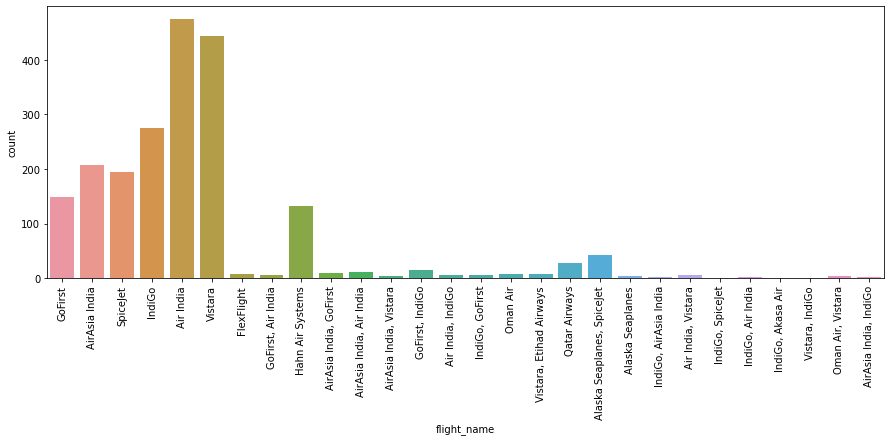

In [164]:
plt.figure(figsize=(15,5))
sns.countplot(data['flight_name'])
plt.xticks(rotation=90)
plt.show()

- Air India and Vistara operates most flights from Goa to Delhi.

In [165]:
data.groupby(['Date','stops']).mean()

price    d_hours      d_min
Date stops                                      
1    1 stop   13541.536082  12.005155  27.860825
     2 stops  15590.130952  15.761905  28.809524
     3 stops  18156.000000  25.000000  50.000000
     direct    8786.454545   2.090909  36.136364
26   1 stop   15547.244681  11.664894  26.781915
     2 stops  19027.609756  17.768293  28.109756
     direct    9867.190476   2.095238  36.190476
27   1 stop   15349.392670  11.801047  27.643979
     2 stops  16570.011628  16.686047  24.767442
     direct    9248.318182   2.090909  36.136364
28   1 stop   17010.710983  11.346821  26.560694
     2 stops  20084.779221  18.155844  26.558442
     3 stops  22786.000000  25.000000  50.000000
     direct   10329.666667   2.083333  35.625000
29   1 stop   19377.688442  11.824121  27.311558
     2 stops  22354.176471  16.882353  26.823529
     direct   15278.500000   2.083333  35.625000
30   1 stop   16489.398907  12.021858  27.978142
     2 stops  18921.567010  15.608247  27.319588
     direct   11031.954545   2.090909  36.136364
31   1 stop   13914.628571  11.680000  27.571429
     2 stops  16760.649351  18.506494  28.766234
     3 stops  12870.500000  24.000000  47.500000
     direct    9354.304348   2.086957  36.086957

- the above data shows that:
    - on 1st prices are low compared to other days, this includes all kinds of flights i.e flights that either takes stops or direct.
    - The prices of fligts for all stops kind increases from 27 to 28, and peaking highest on 29th. After that the prices slowly decreases with least prices in 1st date.
- **The above data in graphical manner is shown below.**    

<AxesSubplot:xlabel='Date,stops'>

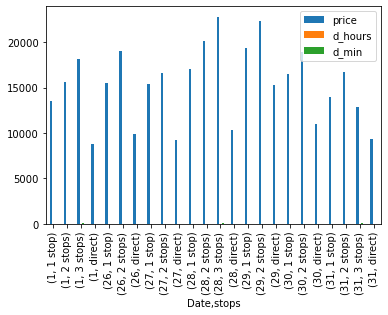

In [166]:
data.groupby(['Date','stops']).mean().plot(kind='bar')


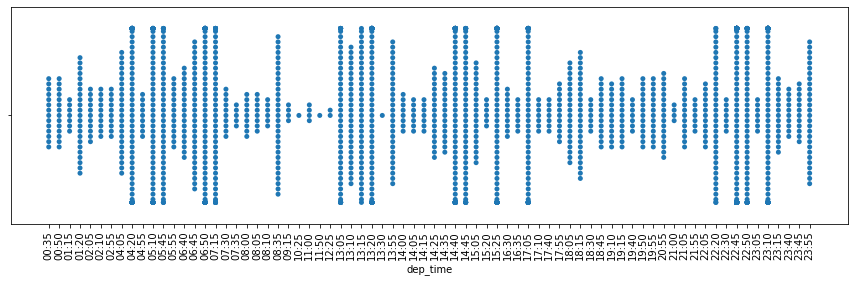

In [167]:
plt.figure(figsize=(15,4))
sns.swarmplot(data['dep_time'])
plt.xticks(rotation=90)
plt.show()

- The above plot shows the number of flights that departed at below mentioned timings.

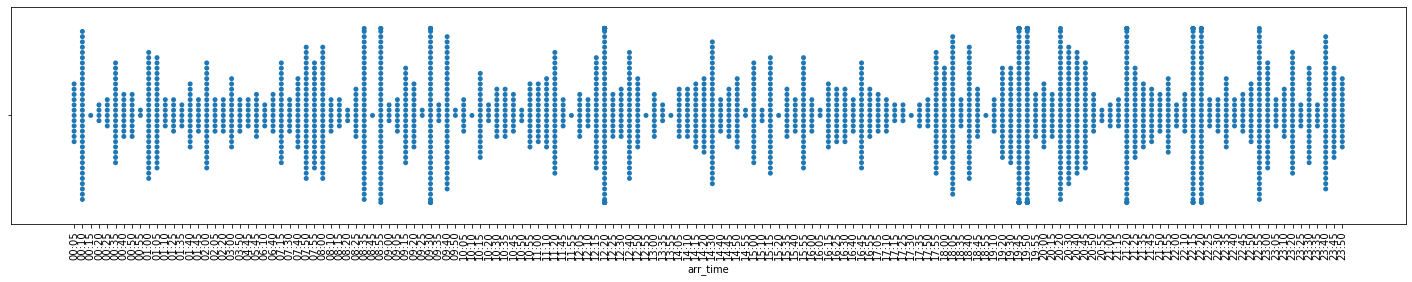

In [168]:
plt.figure(figsize=(25,4))
sns.swarmplot(data['arr_time'])
plt.xticks(rotation=90)
plt.show()

- The above plot shows the number of flights that arrived at Delhi international airport at below mentioned timings.

<AxesSubplot:xlabel='stops', ylabel='count'>

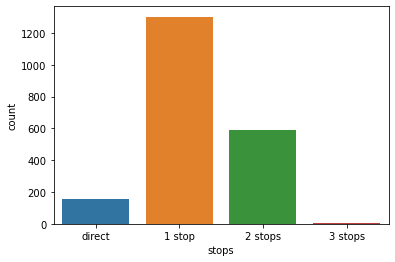

In [169]:
sns.countplot(data['stops'])

- Most number of flights took 1 stop after departing from Goa Airport.
- There are approx.>500 flights that took 2 stops before reaching desrination.
- Very less number of flighs take 3 stops to reach destination.

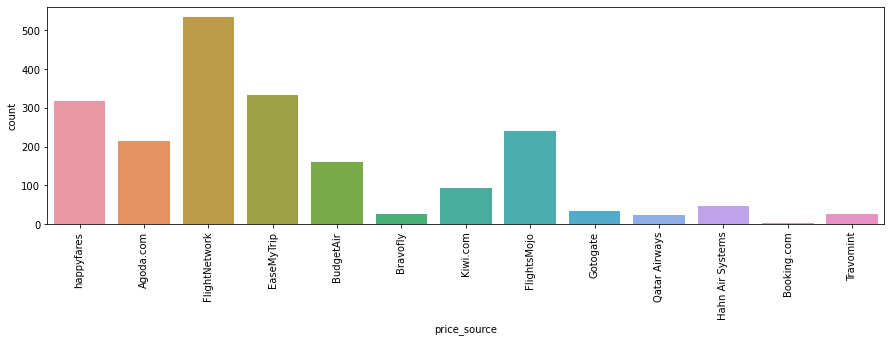

In [170]:
plt.figure(figsize=(15,4))
sns.countplot(data['price_source'])
plt.xticks(rotation=90)
plt.show()

- The above plot shows the source websites that shows cheapest prices of flights departing from Goa to Delhi on particular day.
- It can be seen that in most cases source is FlightNetwork which shows that FlightNetwork source provides cheapest prices for number of flights.
- Very less number of flights are shown from booking.com

In [42]:
data.columns

Index(['Date', 'flight_name', 'dep_loc', 'arr_loc', 'dep_time', 'arr_time',
       'stops', 'price_source', 'price', 'd_hours', 'd_min'],
      dtype='object')

In [171]:
data['price'].nunique()

1246

-It seems like there 1246 unique values present in price column.

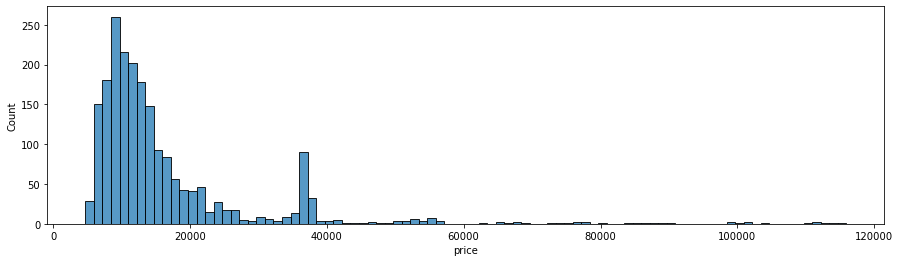

In [172]:
plt.figure(figsize=(15,4))
sns.histplot(data['price'])
plt.show()

- To travel from Goa to delhi most flights charge from approx.INR 5000 to 20000. Over 250 flights charge approx. INR 10000 per trip.
- The prices from Goa tp Delhi can go as high upto 115000 approx. This can be because some flight taken big timely stops before reching destination.


<AxesSubplot:xlabel='d_hours', ylabel='Count'>

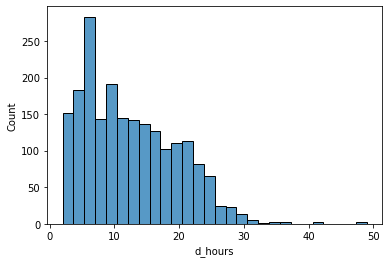

In [173]:
sns.histplot(data['d_hours'])

- Most flights mentioned in dataset take around approx.4-6 hours to reach Delhi from Goa.
- The number of flights are very less who take more time to reach destination 'delhi'

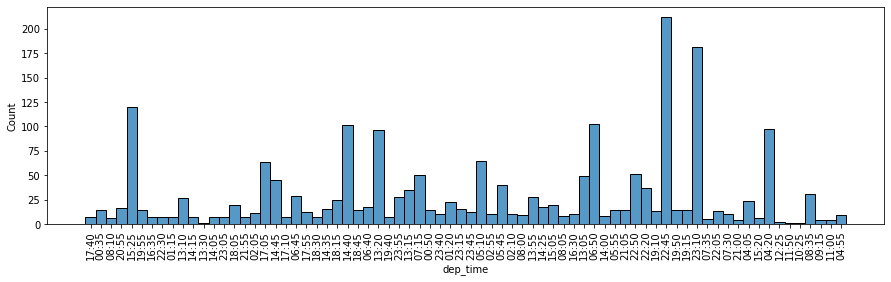

In [174]:
plt.figure(figsize=(15,4))
sns.histplot(data['dep_time'])
plt.xticks(rotation=90)
plt.show()


- Most number of flights depart from Goa at around 11-12 time at night.
- less number of flights are there that leave at midnight.

<AxesSubplot:xlabel='Date', ylabel='price'>

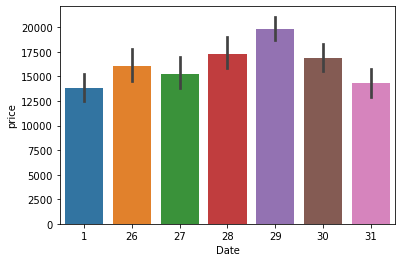

In [175]:
sns.barplot(x='Date',y='price',data=data)

- As seen above fare prices are highest and keeps on increasing from 26-29 and then fare reduces from 30,31 till 1st date.

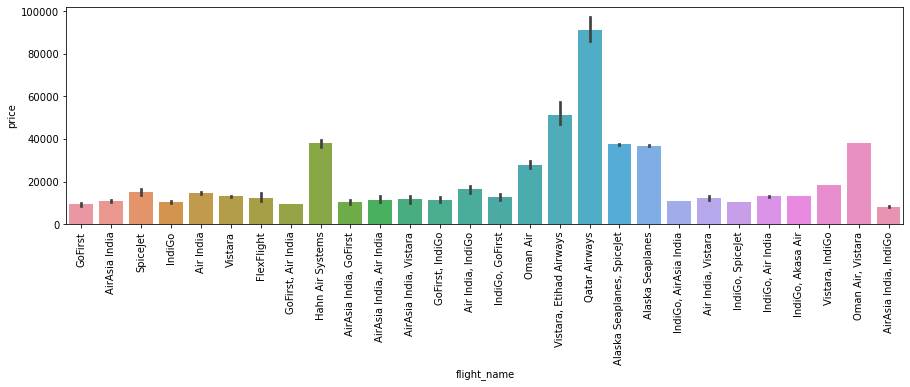

In [177]:
plt.figure(figsize=(15,4))
sns.barplot(x='flight_name',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

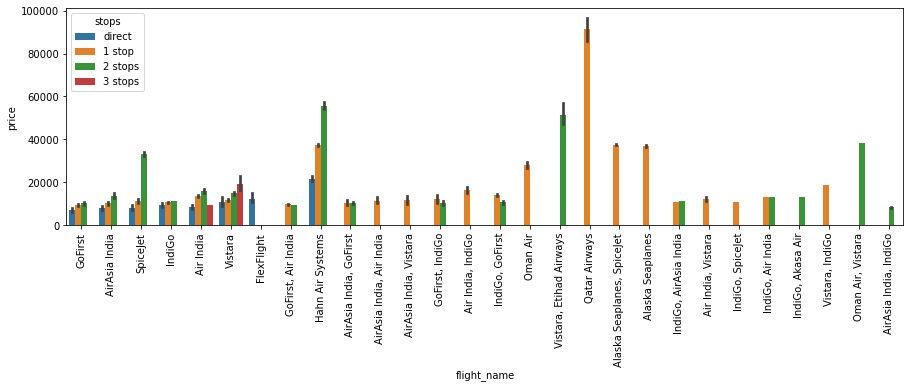

In [202]:
plt.figure(figsize=(15,4))
sns.barplot(x='flight_name',y='price',data=data,hue='stops')
plt.xticks(rotation=90)
plt.show()

- The flight company that charges highest fare to go from Goa to delhi is Qatar airways.
- The least fare from Goa to Delhi is charged by IndiGo,GoFirst,AirIndia,Vistara and Spicejet flights.

In [188]:
data.sort_values('price',ascending=False)[:5]

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,stops,price_source,price,d_hours,d_min
881,28,Qatar Airways,GOIGoa Intl,DELIndira Gandhi Intl,04:05,02:05,1 stop,Gotogate,115914,22,0
597,27,Qatar Airways,GOI Goa Intl,DEL Indira Gandhi Intl,05:10,02:05,1 stop,Qatar Airways,114010,22,0
880,28,Qatar Airways,GOIGoa Intl,DELIndira Gandhi Intl,04:05,08:25,1 stop,Gotogate,113271,28,20
294,26,Qatar Airways,GOIGoa Intl,DELIndira Gandhi Intl,04:05,02:05,1 stop,Qatar Airways,111726,22,0
596,27,Qatar Airways,GOI Goa Intl,DEL Indira Gandhi Intl,07:30,08:25,1 stop,Qatar Airways,111621,28,20


- The above data shows that Qatar Airways is the most expensive flight to travel from Goa to New Delhi.

In [189]:
data.sort_values('price',ascending=True)[:5]

,Date,flight_name,dep_loc,arr_loc,dep_time,arr_time,stops,price_source,price,d_hours,d_min
1,26,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,direct,Agoda.com,4721,2,25
1807,1,GoFirst,GOIGoa Intl,DELIndira Gandhi Intl,00:35,03:00,direct,Agoda.com,4722,2,25
1813,1,Air India,GOIGoa Intl,DELIndira Gandhi Intl,01:15,03:50,direct,EaseMyTrip,4887,2,35
18,26,IndiGo,GOIGoa Intl,DELIndira Gandhi Intl,02:05,06:40,1 stop,happyfares,5214,4,35
37,26,IndiGo,GOIGoa Intl,DELIndira Gandhi Intl,02:05,09:40,1 stop,Agoda.com,5443,7,35


- The above data shows the 5 flights that are least expensive compared to total data.
- These flights take direct route to destination or some take 1 stop.

In [49]:
data.columns

Index(['Date', 'flight_name', 'dep_loc', 'arr_loc', 'dep_time', 'arr_time',
       'stops', 'price_source', 'price', 'd_hours', 'd_min'],
      dtype='object')

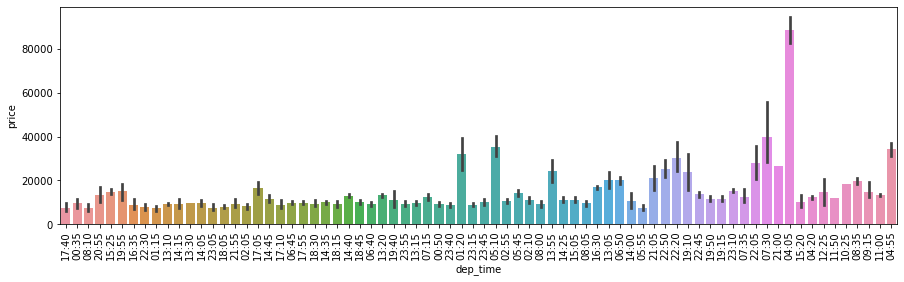

In [196]:
plt.figure(figsize=(15,4))
sns.barplot(x='dep_time',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

- It can be seen from the above plot that people travelling  in evening to early morning flights, will have to pay more fare compared to other departure timings.

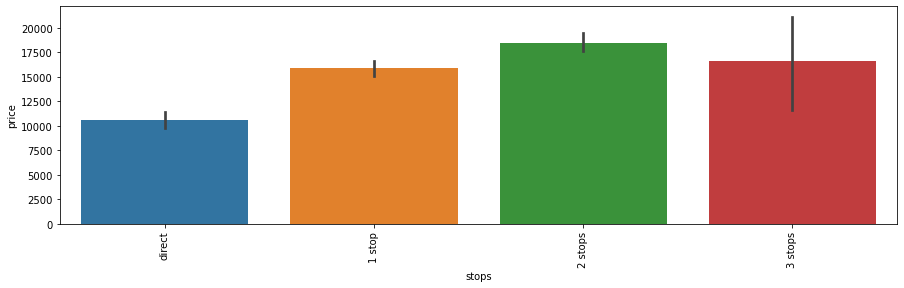

In [199]:
plt.figure(figsize=(15,4))
sns.barplot(x='stops',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

- It can be seen from the plot that for direct flights price is less and gradually increases until flight takes 2 stops.
- It is also seen that flights that take 3 stops to reach destination charges lower than flights that take 2 stops.

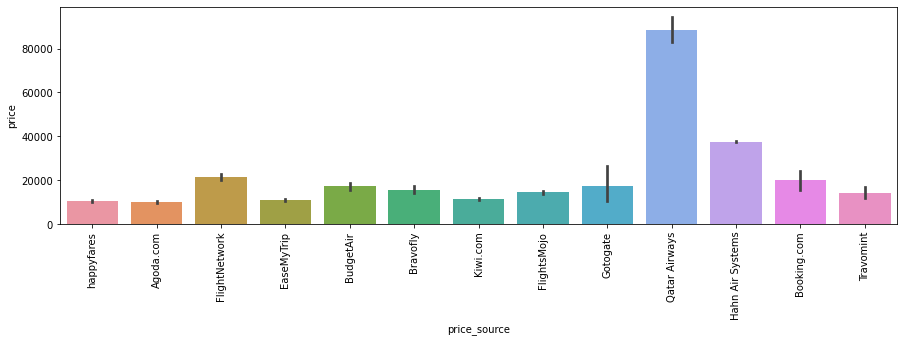

In [200]:
plt.figure(figsize=(15,4))
sns.barplot(x='price_source',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

- The price source vs price plot shows that the prices source from Qatar airways is higher compared to other flight bpoking portals.
- It is also seen that happyfares and Agoda.com are the portals that can be trusted to book cheaper tickets for this journey.

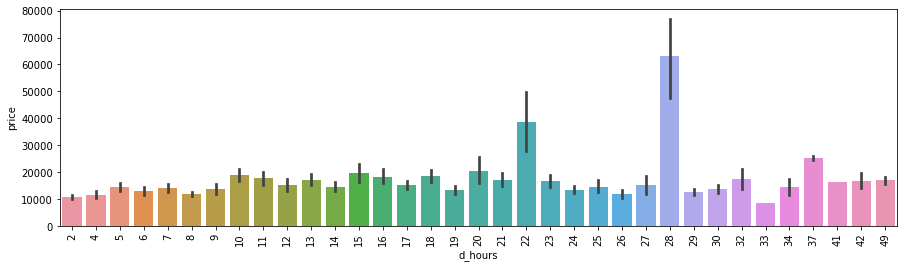

In [201]:
plt.figure(figsize=(15,4))
sns.barplot(x='d_hours',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

- The above plot shows that flights that take >20-30 hours to reach destaination, their fare prices are higher.

**Since the departure and arrival location is same throughout the dataset, then we can delete both columns as it is of no use of keeping same data columns in model building.**


In [54]:
#dropping dep_loc and arr_loc columns
data.drop(['dep_loc','arr_loc'],axis=1,inplace=True)

In [55]:
#printing dataset after dropping columns
data

,Date,flight_name,dep_time,arr_time,stops,price_source,price,d_hours,d_min
0,26,GoFirst,17:40,20:20,direct,happyfares,5904,2,40
1,26,GoFirst,00:35,03:00,direct,Agoda.com,4721,2,25
2,26,AirAsia India,08:10,10:45,direct,happyfares,6659,2,35
3,26,SpiceJet,20:55,23:50,direct,happyfares,6350,2,55
4,26,SpiceJet,15:25,18:05,direct,happyfares,7050,2,40
...,...,...,...,...,...,...,...,...,...
2112,1,"Alaska Seaplanes, SpiceJet",05:10,12:20,1 stop,Hahn Air Systems,37114,7,10
2113,1,"Alaska Seaplanes, SpiceJet",22:50,09:30,1 stop,Hahn Air Systems,37114,10,40
2114,1,"Alaska Seaplanes, SpiceJet",22:50,12:20,1 stop,Hahn Air Systems,37114,13,30
2115,1,"Alaska Seaplanes, SpiceJet",05:10,23:40,1 stop,Hahn Air Systems,37114,18,30


In [56]:
data.shape

(2053, 9)

In [57]:
# splitting the departure and arrival time columns into hours and min.
data['dep_hour']=pd.to_datetime(data['dep_time']).dt.hour
data['dep_min']=pd.to_datetime(data['dep_time']).dt.minute

In [58]:
data['arr_hour']=pd.to_datetime(data['arr_time']).dt.hour
data['arr_min']=pd.to_datetime(data['arr_time']).dt.minute

In [59]:
# dropping original departure and arrival time columns
data.drop(['dep_time','arr_time'],inplace=True,axis=1)
data

,Date,flight_name,stops,price_source,price,d_hours,d_min,dep_hour,dep_min,arr_hour,arr_min
0,26,GoFirst,direct,happyfares,5904,2,40,17,40,20,20
1,26,GoFirst,direct,Agoda.com,4721,2,25,0,35,3,0
2,26,AirAsia India,direct,happyfares,6659,2,35,8,10,10,45
3,26,SpiceJet,direct,happyfares,6350,2,55,20,55,23,50
4,26,SpiceJet,direct,happyfares,7050,2,40,15,25,18,5
...,...,...,...,...,...,...,...,...,...,...,...
2112,1,"Alaska Seaplanes, SpiceJet",1 stop,Hahn Air Systems,37114,7,10,5,10,12,20
2113,1,"Alaska Seaplanes, SpiceJet",1 stop,Hahn Air Systems,37114,10,40,22,50,9,30
2114,1,"Alaska Seaplanes, SpiceJet",1 stop,Hahn Air Systems,37114,13,30,22,50,12,20
2115,1,"Alaska Seaplanes, SpiceJet",1 stop,Hahn Air Systems,37114,18,30,5,10,23,40


# Encoding the data using Label Encoder

In [60]:
#importing library for label encoder

from sklearn.preprocessing import LabelEncoder

label_enc=LabelEncoder()

In [61]:
#transforming the data
df1=label_enc.fit_transform(data['flight_name'])
df2=label_enc.fit_transform(data['stops'])
df3=label_enc.fit_transform(data['price_source'])


In [62]:
data['flight_name']=df1
data['stops']=df2
data['price_source']=df3

In [63]:
data

,Date,flight_name,stops,price_source,price,d_hours,d_min,dep_hour,dep_min,arr_hour,arr_min
0,26,11,3,12,5904,2,40,17,40,20,20
1,26,11,3,0,4721,2,25,0,35,3,0
2,26,3,3,12,6659,2,35,8,10,10,45
3,26,24,3,12,6350,2,55,20,55,23,50
4,26,24,3,12,7050,2,40,15,25,18,5
...,...,...,...,...,...,...,...,...,...,...,...
2112,1,9,0,8,37114,7,10,5,10,12,20
2113,1,9,0,8,37114,10,40,22,50,9,30
2114,1,9,0,8,37114,13,30,22,50,12,20
2115,1,9,0,8,37114,18,30,5,10,23,40


In [64]:
data.shape

(2053, 11)

In [65]:
# describing dataset
data.describe()

,Date,flight_name,stops,price_source,price,d_hours,d_min,dep_hour,dep_min,arr_hour,arr_min
count,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000
mean,24.461276,12.789089,0.521189,5.731612,16241.531905,12.543595,28.066245,14.172918,27.907940,13.936678,28.188018
std,9.852523,9.863485,0.845908,3.482000,13181.839178,7.142566,16.996345,6.951994,17.176268,6.890531,17.437712
min,1.000000,0.000000,0.000000,0.000000,4721.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,3.000000,0.000000,4.000000,9205.000000,7.000000,15.000000,7.000000,10.000000,9.000000,15.000000
50%,28.000000,14.000000,0.000000,5.000000,12135.000000,11.000000,30.000000,14.000000,25.000000,15.000000,30.000000
75%,30.000000,24.000000,1.000000,7.000000,17157.000000,18.000000,40.000000,22.000000,45.000000,20.000000,45.000000
max,31.000000,27.000000,3.000000,12.000000,115914.000000,49.000000,55.000000,23.000000,55.000000,23.000000,55.000000


- There can be outliers present in price column as the difference between interquantiles range is not same. Also implying presence of skewness.

# Plotting the correlation matrix to check for correlation

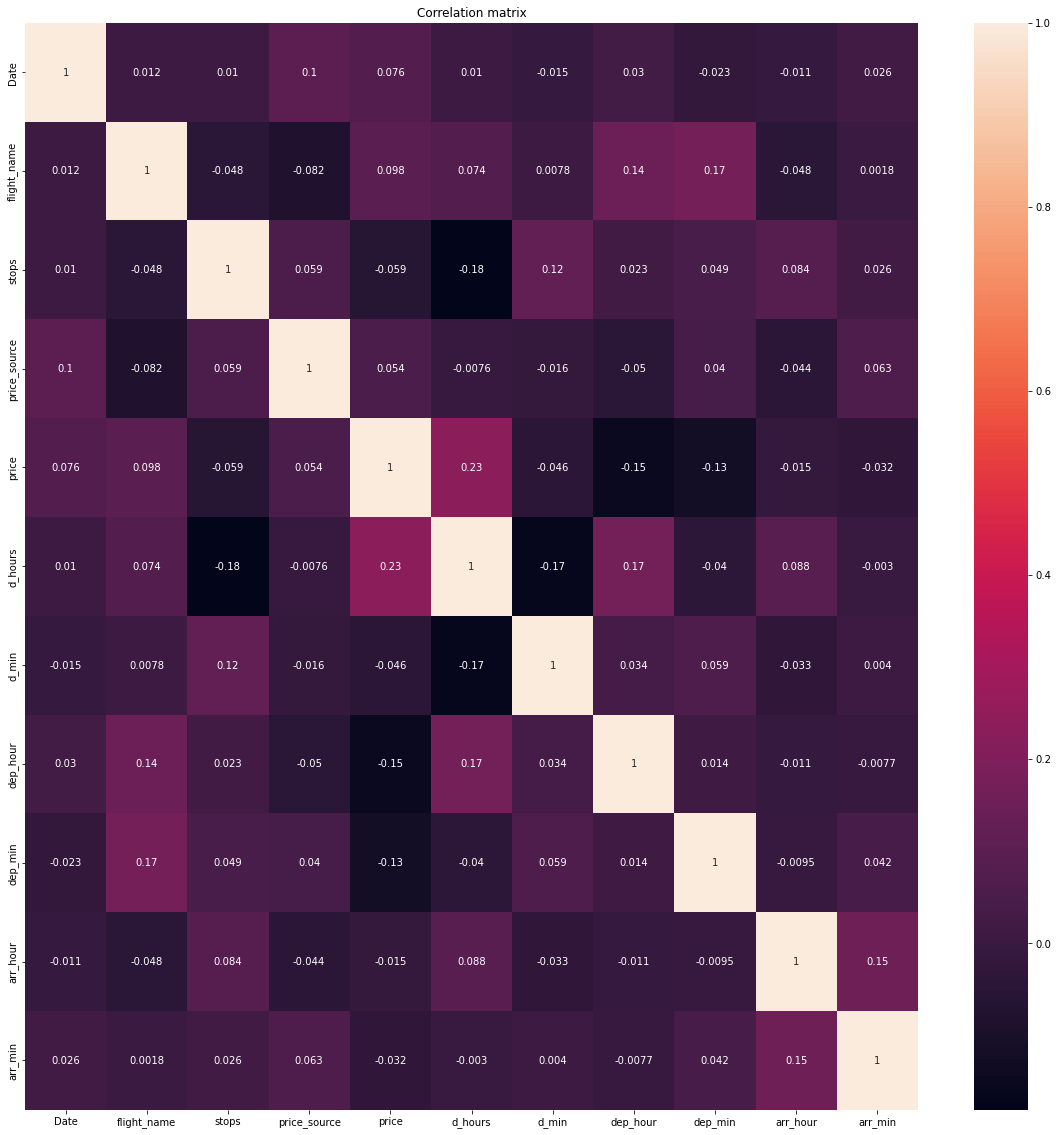

In [66]:
#plotting heatmap

plt.figure(figsize=(20,20))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

- There is no major relation of features with label ('price')
- also the dataset shows no signs of multicollinearity.

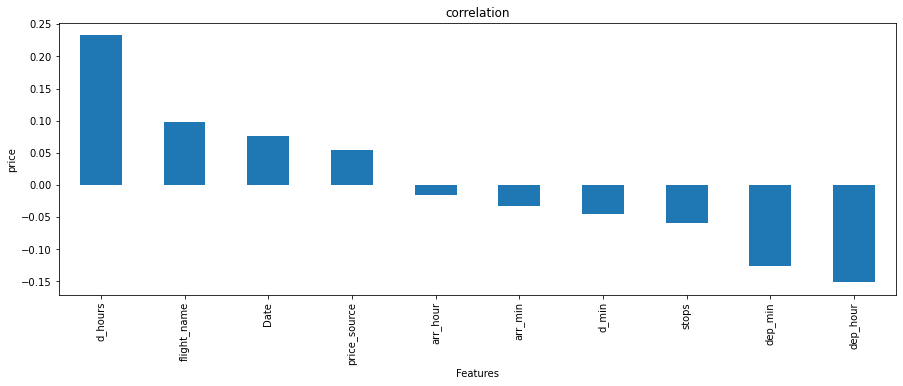

In [67]:
#plotting a coorelation plot that will show relation of features with label(Rain Tomorrow)

plt.figure(figsize=(15,5))
data.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('price')
plt.title('correlation')
plt.show()

- The highest positive relation with label is duration in hours and highest negative relation to label is departure hour.
- The least related feature is arrival hour with respect to label.

# Checking for outliers in dataset

In [68]:
features=['d_hours','d_min','dep_hour','dep_min','arr_hour','arr_min']

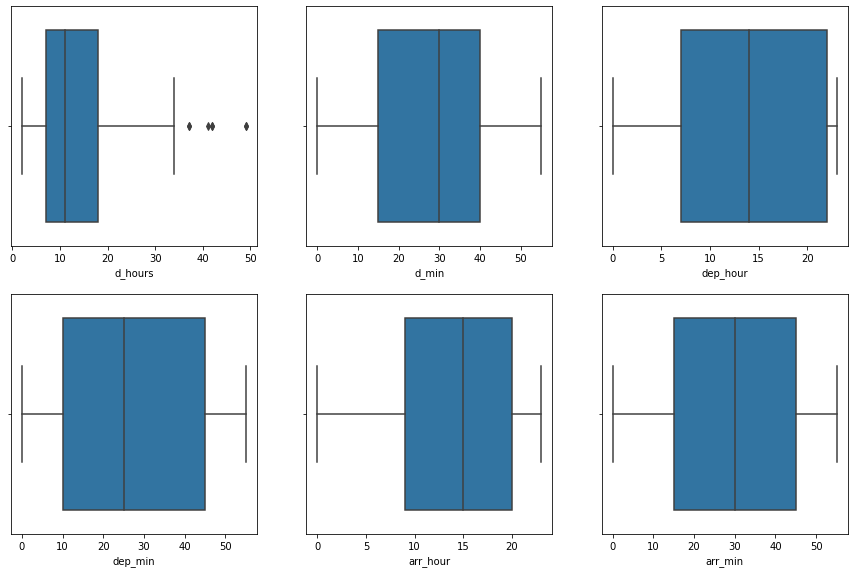

In [69]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in features:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- It can be seen that only d_hours column has outliers present.

# Removing outliers using z square method.

In [70]:
#importing z score library

from scipy.stats import zscore

In [71]:
z_score=zscore(data[['d_hours']])

In [72]:
abs_z_score=np.abs(z_score)

In [73]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [74]:
data=data[filtering_entry]

In [75]:
data.shape

(2044, 11)

# Data loss after removing outliers

In [76]:
# data loss percentage 
data_loss=((2053-2044)/2044)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 0.44031311154598823%


# Checking for skewness in dataset

In [77]:
data.skew()

Date           -1.886250
flight_name    -0.044578
stops           1.859705
price_source    0.468509
price           3.507265
d_hours         0.441043
d_min          -0.060260
dep_hour       -0.291227
dep_min         0.106806
arr_hour       -0.479550
arr_min        -0.046898
dtype: float64

- It can be seen that no column has skewness present. 


<AxesSubplot:xlabel='Date', ylabel='Density'>

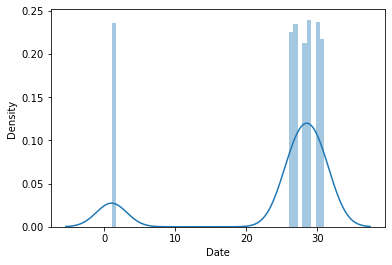

In [78]:
sns.distplot(data['Date'])

 - **In case of date column, though date is considered continuous data but here since only 7 dates are present. The dates starting from 26-31st shows good normal distribution as seen in plot but since i scrapped data for 1st feb there is one more curve seen. If the data was scrapped for more days than data could have been normally distributed.**

# Scaling the data

In [84]:
#importing data standardizing library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [85]:
#dividing data into features (x) and label(y)
x=data.drop(['price'],axis=1)
y=data['price']

In [86]:
#scaling features

x_scaled=scaler.fit_transform(x)

In [87]:
x_scaled

array([[ 0.15729003, -0.18492454,  2.92919499, ...,  0.70180639,
         0.87950026, -0.47040651],
       [ 0.15729003, -0.18492454,  2.92919499, ...,  0.41101128,
        -1.58588172, -1.61676824],
       [ 0.15729003, -0.99736035,  2.92919499, ..., -1.04296425,
        -0.57072443,  0.96254566],
       ...,
       [-2.37580816, -0.38803349, -0.61287239, ...,  1.2833966 ,
        -0.2806795 , -0.47040651],
       [-2.37580816, -0.38803349, -0.61287239, ..., -1.04296425,
         1.31456767,  0.67595522],
       [-2.37580816, -0.38803349, -0.61287239, ...,  1.57419171,
         0.73447779,  1.24913609]])

# VIF

In [88]:
#importing VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature_names']=x.columns
vif

,vif_values,feature_names
0,1.013719,Date
1,1.072082,flight_name
2,1.072641,stops
3,1.034352,price_source
4,1.117187,d_hours
5,1.041147,d_min
6,1.059072,dep_hour
7,1.042887,dep_min
8,1.053232,arr_hour
9,1.032006,arr_min


- No multicolinearity seen within features.

# Model Building part

In [90]:
#importing library for regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing r2 score
from sklearn.metrics import r2_score

#importing train test split
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

#for cross validation score
from sklearn.model_selection import cross_val_score

In [91]:
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
dt=DecisionTreeRegressor()
gbdt=GradientBoostingRegressor()

In [92]:
#finding best random state for random forest model
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_train)
    pred=rf.predict(x_test)
    print('training score is ',(metrics.r2_score(y_train,y_pred)*100),' for random state ',i)
    print('testing score is ',(metrics.r2_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training score is  98.62183049012225  for random state  0
testing score is  88.15547657354466  for random state  0


training score is  98.28835242412882  for random state  1
testing score is  92.61279479875766  for random state  1


training score is  98.38211162926007  for random state  2
testing score is  90.69838146647793  for random state  2


training score is  98.26848362254506  for random state  3
testing score is  90.14186242113988  for random state  3


training score is  98.73848052189061  for random state  4
testing score is  76.87753632747898  for random state  4


training score is  98.24406322596792  for random state  5
testing score is  93.31381726679099  for random state  5


training score is  98.87528830315237  for random state  6
testing score is  77.10775085588737  for random state  6


training score is  98.62383909267103  for random state  7
testing score is  89.70245620317857  for random state  7


training score is  98.47577245282667  for random state  8
testin

In [93]:
# taking random state 5

#making train and test data split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=5)

In [94]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [95]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=rf.predict(x_train) 

pred=rf.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:98.39%
testing R2 score:92.42%


# finding cross validation score

In [96]:
#finding best value for cv in provided range
for i in range(2,20):
    cv_score=cross_val_score(rf,x_scaled,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  64.04064082762346
At cv:- 3
cross validation score:-  73.18556428554105
At cv:- 4
cross validation score:-  74.07369065987866
At cv:- 5
cross validation score:-  69.85702087464237
At cv:- 6
cross validation score:-  41.14503454521714
At cv:- 7
cross validation score:-  76.82104119975465
At cv:- 8
cross validation score:-  72.70388476017116
At cv:- 9
cross validation score:-  62.64209081874823
At cv:- 10
cross validation score:-  65.4856747040869
At cv:- 11
cross validation score:-  8.515989316705447
At cv:- 12
cross validation score:-  7.152859107432809
At cv:- 13
cross validation score:-  46.83152648039749
At cv:- 14
cross validation score:-  42.82298584521487
At cv:- 15
cross validation score:-  -46.97321440817577
At cv:- 16
cross validation score:-  -9.863181844003652
At cv:- 17
cross validation score:-  24.011087259568797
At cv:- 18
cross validation score:-  25.96642842683716
At cv:- 19
cross validation score:-  -69.86029122108002


In [97]:
#cross validation score
print('Cross Validation Score for Random Forest regressor model :- ',((cross_val_score(rf,x_scaled,y,cv=7).mean())*100))

Cross Validation Score for Random Forest regressor model :-  76.54836093095


In [98]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 2158.3140160579796
root mean squared error 3736.390765967458


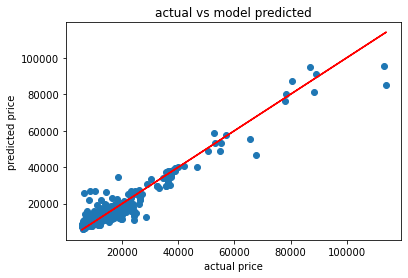

In [99]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs model predicted')
plt.show()

# AdaBoost Regressor

In [100]:
ab.fit(x_train,y_train)

AdaBoostRegressor()

In [101]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=ab.predict(x_train) 

pred=ab.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:59.10%
testing R2 score:60.69%


In [102]:
#cross validation score
print('Cross Validation Score for AdaBoost regressor model :- ',((cross_val_score(ab,x_scaled,y,cv=7).mean())*100))

Cross Validation Score for AdaBoost regressor model :-  46.37939322833099


In [103]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 7251.717576197027
root mean squared error 8510.144047949527


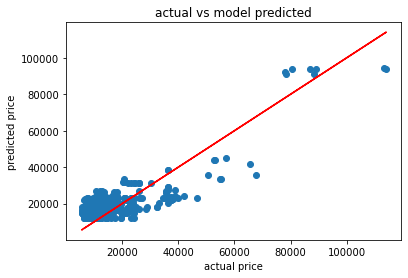

In [104]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs model predicted')
plt.show()

# Decision Tree Regressor

In [105]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [106]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=dt.predict(x_train) 

pred=dt.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:99.98%
testing R2 score:72.93%


In [107]:
#cross validation score
print('Cross Validation Score for Decision Tree regressor model :- ',((cross_val_score(dt,x_scaled,y,cv=7).mean())*100))

Cross Validation Score for Decision Tree regressor model :-  65.11548776017077


In [108]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 2231.4608610567516
root mean squared error 7061.738364002469


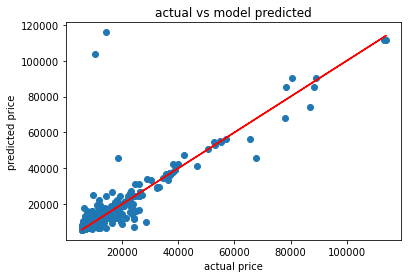

In [109]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs model predicted')
plt.show()

# Gradient Boosting Regressor

In [110]:
gbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [112]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=gbdt.predict(x_train) 

pred=gbdt.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:89.34%
testing R2 score:88.68%


In [113]:
#cross validation score
print('Cross Validation Score for Gradient Boosting regressor model :- ',((cross_val_score(gbdt,x_scaled,y,cv=7).mean())*100))

Cross Validation Score for Gradient Boosting regressor model :-  75.43646729671168


In [114]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 3139.730027530608
root mean squared error 4566.112050211043


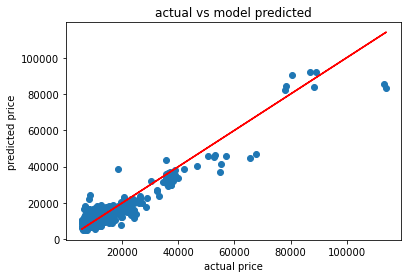

In [115]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs model predicted')
plt.show()

-  Looking at all the scores, looks like Random Forest is the best model since it has seen most data therefore it has got good training and testing score than Gradient Boosting, also Random Forest has less RMSE score than Gradient Boosting.

# Hence Hyperparameter tuning Random Forest model

In [116]:
#importing GridSearchCV library
from sklearn.model_selection import GridSearchCV

In [117]:
#setting parameters for tuning
grid_param=[{'criterion':["squared_error", "absolute_error", "poisson"],
           'min_samples_split':[2,2.5],
            'max_depth':[1,2],
            'bootstrap':[True,False]}]

In [118]:
grid=GridSearchCV(rf,param_grid=grid_param)

In [119]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['squared_error', 'absolute_error',
                                        'poisson'],
                          'max_depth': [1, 2], 'min_samples_split': [2, 2.5]}])

In [120]:
#best parameters for tuning
grid.best_params_

{'bootstrap': True,
 'criterion': 'poisson',
 'max_depth': 2,
 'min_samples_split': 2}

In [121]:
#using best parameters to train

rf1=RandomForestRegressor(criterion='poisson'
                          ,min_samples_split=2,
                          max_depth=2,
                          bootstrap=True)

In [122]:
rf1.fit(x_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=2)

In [123]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=rf1.predict(x_train) 

pred=rf1.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:32.16%
testing R2 score:28.11%


In [124]:
#cross validation score
print('Cross Validation Score for Random forest tuned model :- ',((cross_val_score(rf1,x_scaled,y,cv=7).mean())*100))

Cross Validation Score for Random forest tuned model :-  23.425152745131015


In [125]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 7441.417286466785
root mean squared error 11508.489611944318


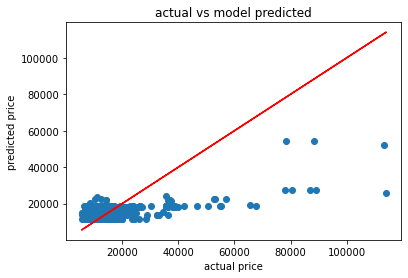

In [126]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs model predicted')
plt.show()

- Since the tuned model gives less testing and training accuracy, hence saving original random forest model.

# Saving the model using pickle

In [127]:
import pickle

In [128]:
pickle.dump(rf,open('flight_prediction','wb'))